In [2]:
import sys
print('Python: {}'.format(sys.version))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [2]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as ply
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length', 'sepal-width', 'petal-ength', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [5]:
print(dataset.shape)
#datasetinfo

(150, 5)


In [9]:
print(dataset.head(30)) #first30data

    sepal-length  sepal-width  petal-ength  petal-width        class
0            5.1          3.5          1.4          0.2  Iris-setosa
1            4.9          3.0          1.4          0.2  Iris-setosa
2            4.7          3.2          1.3          0.2  Iris-setosa
3            4.6          3.1          1.5          0.2  Iris-setosa
4            5.0          3.6          1.4          0.2  Iris-setosa
5            5.4          3.9          1.7          0.4  Iris-setosa
6            4.6          3.4          1.4          0.3  Iris-setosa
7            5.0          3.4          1.5          0.2  Iris-setosa
8            4.4          2.9          1.4          0.2  Iris-setosa
9            4.9          3.1          1.5          0.1  Iris-setosa
10           5.4          3.7          1.5          0.2  Iris-setosa
11           4.8          3.4          1.6          0.2  Iris-setosa
12           4.8          3.0          1.4          0.1  Iris-setosa
13           4.3          3.0     

In [12]:
print(dataset.describe())

       sepal-length  sepal-width  petal-ength  petal-width
count    150.000000   150.000000   150.000000   150.000000
mean       5.843333     3.054000     3.758667     1.198667
std        0.828066     0.433594     1.764420     0.763161
min        4.300000     2.000000     1.000000     0.100000
25%        5.100000     2.800000     1.600000     0.300000
50%        5.800000     3.000000     4.350000     1.300000
75%        6.400000     3.300000     5.100000     1.800000
max        7.900000     4.400000     6.900000     2.500000


In [13]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


AttributeError: 'Series' object has no attribute 'show'

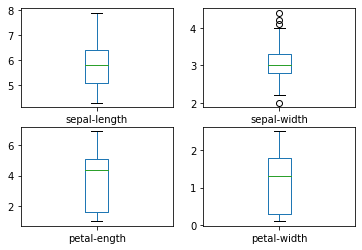

In [21]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

AttributeError: 'Series' object has no attribute 'show'

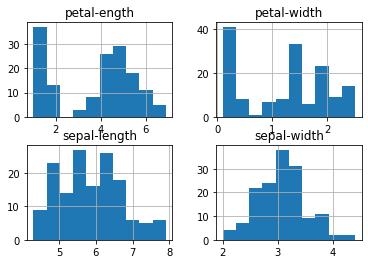

In [23]:
#histogram
dataset.hist()
plt.show()

NameError: name 'plt' is not defined

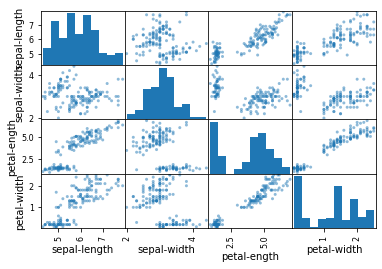

In [6]:
scatter_matrix(dataset)
plt.show()

In [9]:
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=6
X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X,Y,test_size=validation_size, random_state=seed)

In [10]:
seed = 6
scoring = 'accuracy'

In [11]:
#spotcheckalgo
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#evaluate_each_model_in_turn
results=[]
names=[]
for name, model in models:
    kfold=model_selection.KFold(n_splits=10, random_state=seed)
    cv_results=model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\mrina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mrina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mrina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mrina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mrina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

LR: 0.941667 (0.038188)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.941667 (0.075000)
NB: 0.966667 (0.055277)
SVM: 0.966667 (0.055277)


C:\Users\mrina\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mrina\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mrina\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mrina\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni